## Importação do Dataset

In [173]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [174]:
df= pd.read_csv("siga-empreendimentos-geracao.csv",encoding="ISO-8859-1", sep=";")

In [175]:
#método para mostrar todas as colunas e nenhuma ser omitida
pd.options.display.max_columns = None

## Análise Preliminar do Dataframe

In [176]:
df.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,NomFonteCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2023-03-17,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"1400,00",1400,",00",Não,"-20,12479858","-43,87020250",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2023-03-17,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"3972,00",3972,",00",Não,"-20,13187300","-43,87693500",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2023-03-17,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01,"1440,00",1440,",00",Não,"-20,13754468","-43,89192620",2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2023-03-17,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25,"100000,00",100000,"45200,00",Não,"-29,06475278","-51,67494167",2001-03-15,2039-11-13,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2023-03-17,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15,"720,00",720,"510,00",Não,"-27,82377500","-52,06999722",NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS


In [177]:
print(df.columns)

Index(['DatGeracaoConjuntoDados', 'NomEmpreendimento', 'IdeNucleoCEG',
       'CodCEG', 'SigUFPrincipal', 'SigTipoGeracao', 'DscFaseUsina',
       'DscOrigemCombustivel', 'DscFonteCombustivel', 'DscTipoOutorga',
       'NomFonteCombustivel', 'DatEntradaOperacao', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw',
       'IdcGeracaoQualificada', 'NumCoordNEmpreendimento',
       'NumCoordEEmpreendimento', 'DatInicioVigencia', 'DatFimVigencia',
       'DscPropriRegimePariticipacao', 'DscSubBacia', 'DscMuninicpios'],
      dtype='object')


In [178]:
#mudando a ordem das colunas para facilitar a visualização do dados
new_order_colunm = [ 'NomEmpreendimento','SigUFPrincipal', 'SigTipoGeracao', 
       'DscOrigemCombustivel', 'DscFonteCombustivel', 
       'NomFonteCombustivel', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw','DscFaseUsina','DscSubBacia',
        'DatEntradaOperacao','DatInicioVigencia','DatFimVigencia',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento','DscTipoOutorga',
       'DscPropriRegimePariticipacao', 'DscMuninicpios','IdeNucleoCEG','CodCEG',
       'IdcGeracaoQualificada',
       'DatGeracaoConjuntoDados']
df = df[new_order_colunm]

In [179]:
#escolha de elementos aleatorios
df.sample(3)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
13707,Elizabete de Carvalho Moreira,PA,UFV,Solar,Radiação solar,Radiação solar,"1,00",1,",00",Operação,NaN,2021-12-15,NaN,NaN,"-2,79302600","-50,35590700",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,58634,UFV.RS.PA.058634-0.1,NaN,2023-03-17
276,Marcol,RO,CGH,Hídrica,Potencial hidráulico,Potencial hidráulico,"2500,20",2500,",00",Operação,15 - Madeira,2011-11-24,NaN,NaN,"-12,84516383","-60,32204556",Registro,100% para MMRC GERAÇÃO DE ENERGIA LTDA (REG),Vilhena - RO,1412,CGH.PH.RO.001412-5.2,Não,2023-03-17
22498,Sog002203,MS,UFV,Solar,Radiação solar,Radiação solar,"1,38",1,",00",Operação,NaN,2022-08-02,NaN,NaN,"-17,83494000","-55,50681000",Registro,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,Corumbá - MS,68106,UFV.RS.MS.068106-7.1,NaN,2023-03-17


In [180]:
#comando retorna a quantidade de linhas e colunas (linhas, colunas)
df.shape

(24600, 23)

In [181]:
print(df['NomFonteCombustivel'].unique())

['Potencial hidráulico' 'Gás de Alto Forno - CM' 'Óleo Diesel'
 'Bagaço de Cana de Açúcar' 'Gás Natural' 'Urânio' 'Licor Negro'
 'Óleo Combustível' 'Calor de Processo - CM'
 'Outros Energéticos de Petróleo' 'Carvão Mineral' 'Resíduos Florestais'
 'Calor de Processo - GN' 'Gás de Refinaria' 'Biogás - RU'
 'Cinética do vento' 'Lenha' 'Casca de Arroz' 'Radiação solar'
 'Carvão Vegetal' 'Gás de Alto Forno - PE' 'Gás de Alto Forno - Biomassa'
 'Calor de Processo - OF' 'Biogás - RA' 'Capim Elefante' 'Óleos vegetais'
 'Biogás-AGR' 'Resíduos Sólidos Urbanos - RU' 'Biogás - Floresta' 'Etanol'
 'Carvão - RU']


In [182]:
if isinstance(df.index, pd.DatetimeIndex):
    print("A série é uma série temporal")
else:
    print("A série não é uma série temporal")

A série não é uma série temporal


**Saber se todos os Estado estão presentes no dataset e a quantidade de cidades catalogadas**

In [183]:
df['SigUFPrincipal'].nunique()

27

In [184]:
df['SigUFPrincipal'].unique()

array(['MG', 'RS', 'SC', 'TO', 'RR', 'MT', 'SP', 'ES', 'RO', 'AM', 'RJ',
       'PR', 'CE', 'BA', 'MA', 'PI', 'AL', 'GO', 'PB', 'AP', 'MS', 'PE',
       'PA', 'DF', 'SE', 'RN', 'AC'], dtype=object)

In [185]:
df['DscMuninicpios'].nunique()

2082

**Saber maior valor presente no dataframe**

In [186]:
maior_pot = df['MdaPotenciaFiscalizadaKw'].idxmax()
print(df.loc[maior_pot])

NomEmpreendimento                                         Belo Monte
SigUFPrincipal                                                    PA
SigTipoGeracao                                                   UHE
DscOrigemCombustivel                                         Hídrica
DscFonteCombustivel                             Potencial hidráulico
NomFonteCombustivel                             Potencial hidráulico
MdaPotenciaOutorgadaKw                                   11233100,00
MdaPotenciaFiscalizadaKw                                    11233100
MdaGarantiaFisicaKw                                       4418900,00
DscFaseUsina                                                Operação
DscSubBacia                                        18 - Xingu e Paru
DatEntradaOperacao                                        2016-04-20
DatInicioVigencia                                         2010-08-26
DatFimVigencia                                            2045-08-26
NumCoordNEmpreendimento           

**Saber os tipos de dados das variáveis para saber quais devem ser corrigidos**

In [187]:
df.dtypes

NomEmpreendimento               object
SigUFPrincipal                  object
SigTipoGeracao                  object
DscOrigemCombustivel            object
DscFonteCombustivel             object
NomFonteCombustivel             object
MdaPotenciaOutorgadaKw          object
MdaPotenciaFiscalizadaKw         int64
MdaGarantiaFisicaKw             object
DscFaseUsina                    object
DscSubBacia                     object
DatEntradaOperacao              object
DatInicioVigencia               object
DatFimVigencia                  object
NumCoordNEmpreendimento         object
NumCoordEEmpreendimento         object
DscTipoOutorga                  object
DscPropriRegimePariticipacao    object
DscMuninicpios                  object
IdeNucleoCEG                     int64
CodCEG                          object
IdcGeracaoQualificada           object
DatGeracaoConjuntoDados         object
dtype: object

## Data Cleaning

### Transformando os tipos de dados

**As potências estão com o tipo object, devem ser convertidas para o tipo float paraconseguir trabalhar com esses dados**

In [188]:
df['MdaPotenciaFiscalizadaKw'] = df['MdaPotenciaFiscalizadaKw'].astype(float)

In [189]:
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].str.replace(',', '.')
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].astype(float)

In [190]:
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].str.replace(',00', '.00')
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].astype(float)

**As data também devem ser alteradas para o tipo datatime**

In [191]:
df['DatEntradaOperacao'] = pd.to_datetime(df['DatEntradaOperacao'], format='%Y/%m/%d')
df['DatInicioVigencia'] = pd.to_datetime(df['DatInicioVigencia'], format='%Y/%m/%d')
df['DatFimVigencia'] = pd.to_datetime(df['DatFimVigencia'], format='%Y/%m/%d')

In [192]:
#verificando se as alterações deram certo
df.dtypes

NomEmpreendimento                       object
SigUFPrincipal                          object
SigTipoGeracao                          object
DscOrigemCombustivel                    object
DscFonteCombustivel                     object
NomFonteCombustivel                     object
MdaPotenciaOutorgadaKw                 float64
MdaPotenciaFiscalizadaKw               float64
MdaGarantiaFisicaKw                    float64
DscFaseUsina                            object
DscSubBacia                             object
DatEntradaOperacao              datetime64[ns]
DatInicioVigencia               datetime64[ns]
DatFimVigencia                  datetime64[ns]
NumCoordNEmpreendimento                 object
NumCoordEEmpreendimento                 object
DscTipoOutorga                          object
DscPropriRegimePariticipacao            object
DscMuninicpios                          object
IdeNucleoCEG                             int64
CodCEG                                  object
IdcGeracaoQua

**Considerar apenas os empreendimento em operação para ser mais coerente os cálculos**

In [193]:
df['DscFaseUsina'].unique()

array(['Operação', 'Construção não iniciada', 'Construção'], dtype=object)

In [194]:
df[df['DscFaseUsina'].str.lower() != 'operação']['DscFaseUsina'].value_counts()

Construção não iniciada    2436
Construção                  342
Name: DscFaseUsina, dtype: int64

In [195]:
df = df[df['DscFaseUsina'].str.lower() == 'operação']

In [196]:
df.sample(6)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
4436,FNS-MC,SC,UTE,Fóssil,Petróleo,Óleo Diesel,160.0,160.0,0.0,Operação,NaN,2013-03-29,NaT,NaT,"-27,59027778","-48,53249999",Registro,100% para Claro S.A (REG),Florianópolis - SC,33501,UTE.PE.SC.033501-0.1,Não,2023-03-17
239,Vila Jundiá,RR,UTE,Fóssil,Petróleo,Óleo Diesel,960.0,960.0,0.0,Operação,NaN,2003-04-16,NaT,NaT,"-,20972222","-60,69638889",Registro,100% para Companhia Energética de Roraima (REG),Rorainópolis - RR,1279,UTE.PE.RR.001279-3.1,Não,2023-03-17
5343,CONDOMINIO EDIFICIO BIRMANN 09,SP,UTE,Fóssil,Petróleo,Óleo Diesel,220.0,220.0,0.0,Operação,NaN,1990-01-01,NaT,NaT,"-23,65388889","-46,71638888",Registro,100% para CONDOMINIO EDIFICIO BIRMANN 09 (REG),São Paulo - SP,35770,UTE.PE.SP.035770-7.1,Não,2023-03-17
18004,Magno Valente Miranda,PA,UFV,Solar,Radiação solar,Radiação solar,1.0,1.0,0.0,Operação,NaN,2022-03-24,NaT,NaT,"-2,25071700","-50,58139300",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,63450,UFV.RS.PA.063450-6.1,NaN,2023-03-17
22255,Fernando Dos Santos,PA,UFV,Solar,Radiação solar,Radiação solar,1.0,1.0,0.0,Operação,NaN,2022-07-25,NaT,NaT,"-1,71089200","-50,17799200",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Curralinho - PA,67863,UFV.RS.PA.067863-5.1,NaN,2023-03-17
1270,Moore,SP,UTE,Fóssil,Petróleo,Óleo Diesel,1296.0,1296.0,0.0,Operação,NaN,2002-09-20,NaT,NaT,"-23,52900967","-46,78253455",Registro,100% para Moore Brasil Ltda (REG),Osasco - SP,28938,UTE.PE.SP.028938-8.1,Não,2023-03-17


In [197]:
df.shape

(21822, 23)

### Dados Nulos

Dados nulos podem interferir no resultado e por isso devem ser manipulados. 

In [198]:
print('Quantidade de dados nulos: ', df.isna().sum().sum())

Quantidade de dados nulos:  75140


In [199]:
#isnull() e isna() são equivalentes, ambas retornam boleanos para valores nulos (NaN - not a number) 
#sum() contabiliza os nulos
df.isnull().sum()

NomEmpreendimento                   0
SigUFPrincipal                      0
SigTipoGeracao                      0
DscOrigemCombustivel                0
DscFonteCombustivel                 0
NomFonteCombustivel                 0
MdaPotenciaOutorgadaKw              0
MdaPotenciaFiscalizadaKw            0
MdaGarantiaFisicaKw                 0
DscFaseUsina                        0
DscSubBacia                     20461
DatEntradaOperacao                  0
DatInicioVigencia               19317
DatFimVigencia                  19326
NumCoordNEmpreendimento             0
NumCoordEEmpreendimento             0
DscTipoOutorga                      0
DscPropriRegimePariticipacao        0
DscMuninicpios                      0
IdeNucleoCEG                        0
CodCEG                              0
IdcGeracaoQualificada           16036
DatGeracaoConjuntoDados             0
dtype: int64

In [200]:
df['IdcGeracaoQualificada'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [201]:
df['DatInicioVigencia'].unique()

array(['2000-07-07T00:00:00.000000000', '2000-08-31T00:00:00.000000000',
       '2001-03-15T00:00:00.000000000', ...,
       '2021-11-09T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2022-03-21T00:00:00.000000000'], dtype='datetime64[ns]')

Para realizar a manupulação dos dados nulos optou-se por substituir por um valor conhecido de mesmo tipo. Se optasse por excluir as linhas, a maioria seria eliminada e impactaria muito no resultado.

In [202]:
#usando metodo loc para subistituir NaN por valores padrões; Foi escolhido valores similiares ao tipo de dados.
df.loc[df['IdcGeracaoQualificada'].isnull(),'IdcGeracaoQualificada']= 'Other'
df.loc[df['DatInicioVigencia'].isnull(),'DatInicioVigencia']= '2023-01-01'
df.loc[df['DatFimVigencia'].isnull(),'DatFimVigencia']= '2023-01-01'
df.loc[df['DscSubBacia'].isnull(),'DscSubBacia']= '00 - sem identificacao'

In [203]:
#pode-se ver que foi substituido os NaN por valores padrões
df.sample(8)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
7377,Tamires Miranda Pinheiro,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2018-01-22,2023-01-01,2023-01-01,"-1,87189000","-52,63510000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,39788,UFV.RS.PA.039788-1.1,Other,2023-03-17
16477,Sog000907_2278373,MS,UFV,Solar,Radiação solar,Radiação solar,1.38,1.0,0.0,Operação,00 - sem identificacao,2021-11-27,2023-01-01,2023-01-01,"-17,92151600","-57,47290400",Registro,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,Corumbá - MS,61867,UFV.RS.MS.061867-5.1,Other,2023-03-17
9129,Anselmo Dos Santos Moura,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2009-08-23,2023-01-01,2023-01-01,"-3,75000600","-49,82135800",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Tucuruí - PA,45471,UFV.RS.PA.045471-0.1,Other,2023-03-17
7664,Valdiney Barbosa Braga,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2018-02-02,2023-01-01,2023-01-01,"-1,90965000","-52,57603000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,40075,UFV.RS.PA.040075-0.1,Other,2023-03-17
4747,Cencosud - Bretas - 524,GO,UTE,Fóssil,Petróleo,Óleo Diesel,720.00,720.0,0.0,Operação,00 - sem identificacao,2007-08-30,2023-01-01,2023-01-01,"-17,78966664","-50,92019442",Registro,100% para CENCOSUD BRASIL COMERCIAL LTDA (REG),Rio Verde - GO,34077,UTE.PE.GO.034077-4.1,Não,2023-03-17
690,Cocais Grande,MG,PCH,Hídrica,Potencial hidráulico,Potencial hidráulico,10000.00,10000.0,4860.0,Operação,56 - Doce,2009-03-05,2009-03-05,2039-03-05,"-19,51995924","-42,76667075",Autorização,100% para SPE Cocais Grande Energia S.A. (PIE),Antônio Dias - MG,27728,PCH.PH.MG.027728-2.1,Não,2023-03-17
2898,Condomínio Edifício Altos do Estoril,SP,UTE,Fóssil,Petróleo,Óleo Diesel,80.00,80.0,0.0,Operação,00 - sem identificacao,2012-10-04,2023-01-01,2023-01-01,"-23,53492311","-46,76546349",Registro,100% para RAVE EMPREENDIMENTOS LTDA - EPP (REG),Osasco - SP,30965,UTE.PE.SP.030965-6.1,Não,2023-03-17
20292,Hilda Alves da Silva,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2022-05-26,2023-01-01,2023-01-01,"-1,71813600","-49,61557000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Curralinho - PA,65791,UFV.RS.PA.065791-3.1,Other,2023-03-17


In [204]:
#verificando se deu certo a substituição dos dados nulos
df.isnull().sum()

NomEmpreendimento               0
SigUFPrincipal                  0
SigTipoGeracao                  0
DscOrigemCombustivel            0
DscFonteCombustivel             0
NomFonteCombustivel             0
MdaPotenciaOutorgadaKw          0
MdaPotenciaFiscalizadaKw        0
MdaGarantiaFisicaKw             0
DscFaseUsina                    0
DscSubBacia                     0
DatEntradaOperacao              0
DatInicioVigencia               0
DatFimVigencia                  0
NumCoordNEmpreendimento         0
NumCoordEEmpreendimento         0
DscTipoOutorga                  0
DscPropriRegimePariticipacao    0
DscMuninicpios                  0
IdeNucleoCEG                    0
CodCEG                          0
IdcGeracaoQualificada           0
DatGeracaoConjuntoDados         0
dtype: int64

Verificando os valores outliers. Nesse caso é a usina de Belo Monte que tem uma potência física garantida muito superior a qualquer outra usina. Nesse caso não pode excluir ou manipular esse outlier por ser um valor real e importante.

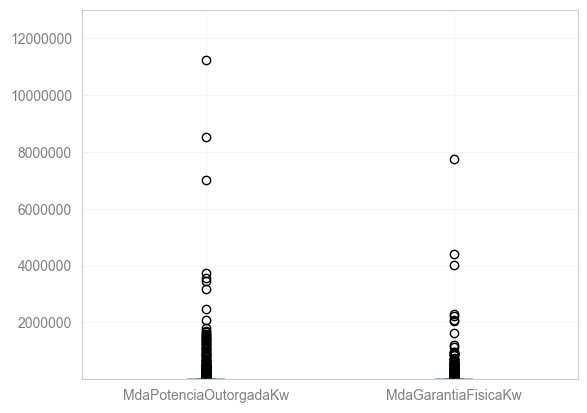

In [205]:
#outlier
ax = df.boxplot(column=['MdaPotenciaOutorgadaKw','MdaGarantiaFisicaKw'])
ax.set_ylim(1, 13000000)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax=plt.show

In [206]:
df[(df['NomEmpreendimento'] == 'Itaipu (Parte Brasileira)') | (df['NomEmpreendimento'] == 'Belo Monte')]

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
211,Itaipu (Parte Brasileira),PR,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,7000000.0,7000000.0,7750800.0,Operação,"64 - Parana, Paranapanema, Amambai e outros",1989-04-01,1973-08-30,2023-08-30,"-25,40831282","-54,58741668",Concessão,100% para Itaipu Binacional (SP),Foz do Iguaçu - PR,1161,UHE.PH.PR.001161-4.1,Não,2023-03-17
2398,Belo Monte,PA,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,11233100.0,11233100.0,4418900.0,Operação,18 - Xingu e Paru,2016-04-20,2010-08-26,2045-08-26,"-3,12638900","-51,77500000",Concessão,100% para NORTE ENERGIA S/A (PIE),"Altamira - PA, Vitória do Xingu - PA",30354,UHE.PH.PA.030354-2.1,Não,2023-03-17


## Entendendo a distribuição Energética

In [207]:
#coluna que apresenta a chave-primária - valores únicos
df['IdeNucleoCEG'].nunique()

21820

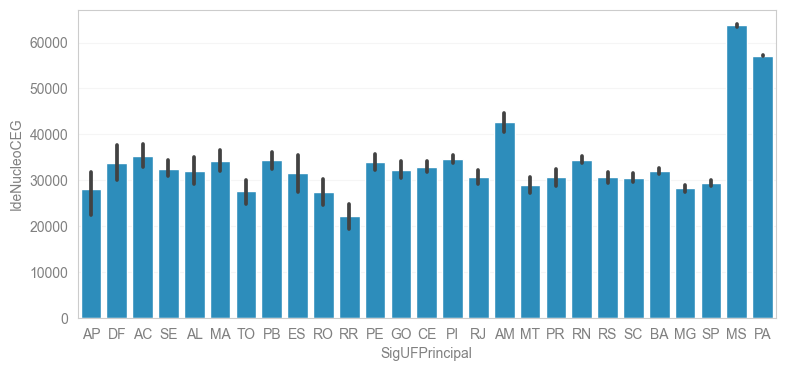

In [208]:
sns.set_style("whitegrid", {"grid.color": "#f5f5f5"})
sns.set_style(rc={"axes.labelcolor": "#808080", "xtick.color": "#808080", "ytick.color": "#808080"})
ordenado = df.groupby('SigUFPrincipal')['IdeNucleoCEG'].nunique().sort_values()
ax = sns.barplot(x='SigUFPrincipal', y='IdeNucleoCEG', data=df, color='#1696d2', order=ordenado.index)
ax.figure.set_size_inches(9,4)

In [209]:
(df[df['MdaPotenciaFiscalizadaKw'] <= 10])['MdaPotenciaFiscalizadaKw'].count()

16121

In [210]:
df['DscMuninicpios'].value_counts(ascending=False)

Portel - PA                           5708
Corumbá - MS                          2865
Porto de Moz - PA                     2288
Curralinho - PA                       2210
Tucuruí - PA                          1394
                                      ... 
Caarapó - MS                             1
Belo Oriente - MG                        1
Matos Costa - SC, Porto União - SC       1
Alvarenga - MG, Pocrane - MG             1
Cariacica - ES                           1
Name: DscMuninicpios, Length: 1897, dtype: int64

In [211]:
pot_estado = df.groupby('SigUFPrincipal')['MdaPotenciaFiscalizadaKw'].sum()
df_pot_estado = pd.DataFrame({'estado': pot_estado.index, 'potencia_total': pot_estado.values})
df_pot_estado.head()

,estado,potencia_total
0,AC,142883.0
1,AL,782801.0
2,AM,2086461.0
3,AP,973705.0
4,BA,15975508.0


Comparativo entre gráficos: Gráfico sem e com tratamento que possuem a mesma base de dados. 

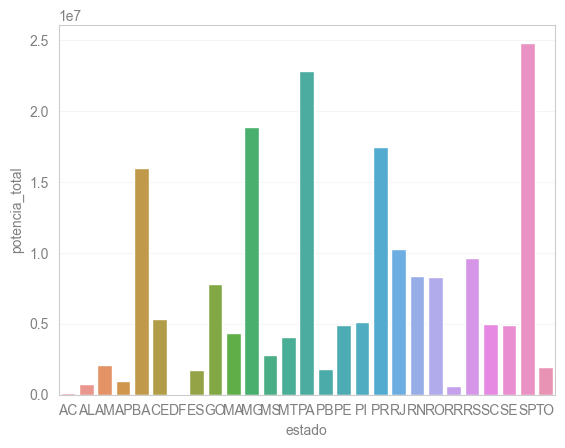

In [212]:
ax2 = sns.barplot(x='estado', y='potencia_total', data = df_pot_estado)

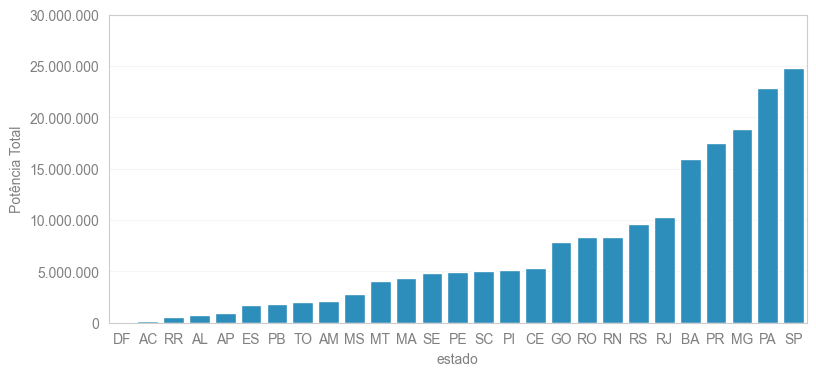

In [213]:
from matplotlib.ticker import ScalarFormatter
ordenado = df_pot_estado.sort_values('potencia_total')
ax2 = sns.barplot(x='estado', y='potencia_total', data = df_pot_estado, order=ordenado['estado'], color='#1696d2')
ax2.set_ylabel('Potência Total')
ytick_labels = [f'{int(y):,}'.replace(',', '.') for y in ax2.get_yticks()]
ytick_locs = ax2.get_yticks()
ax2.set_yticks(ytick_locs)
ax2.set_yticklabels(ytick_labels)
ax2.figure.set_size_inches(9,4)


Entendendo a distribuição de energia por estado

In [214]:
df_counts = df.groupby(['SigUFPrincipal', 'SigTipoGeracao']).count()['IdeNucleoCEG'].unstack()

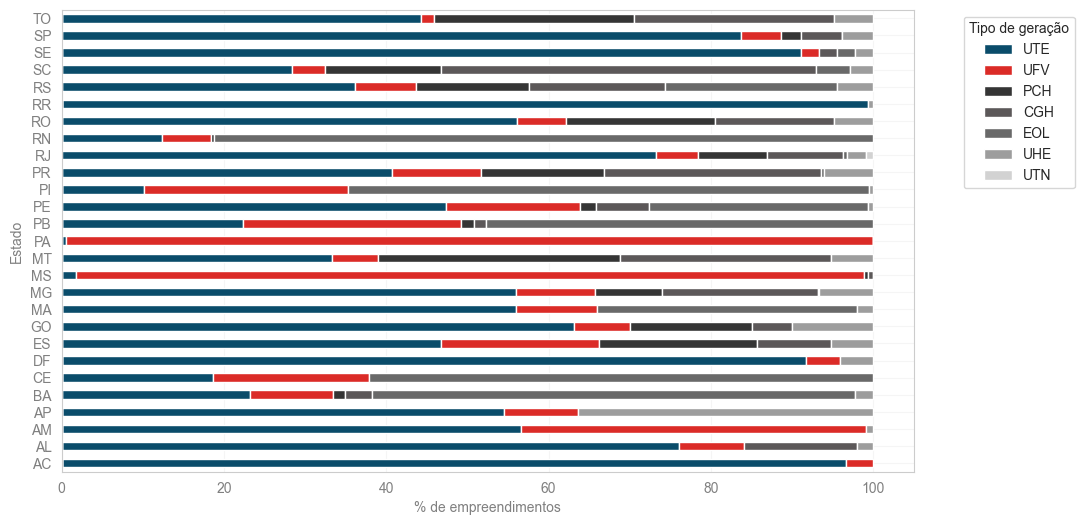

In [215]:
colors=["#0a4c6a","#db2b27","#353535","#5c5859","#696969","#9d9d9d", "#d2d2d2"];
ordem_tipo_geração = ['UTE','UFV','PCH','CGH','EOL','UHE','UTN']
ax03=(df_counts.div(df_counts.sum(axis=1), axis=0) * 100).plot.barh(stacked=True, color=colors,y=ordem_tipo_geração)
plt.xlabel('% de empreendimentos')
plt.ylabel('Estado')
plt.legend(title='Tipo de geração', bbox_to_anchor=(1.05, 1), loc='upper left')
ax03.figure.set_size_inches(11,6)

O gráfico abaixo é o mesmo do grafico apresentado acima, porém sem nenhuma manipulação para melhoria de design.

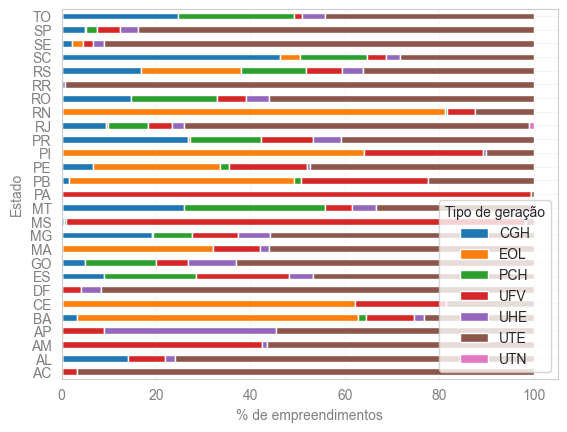

In [216]:
ax03=(df_counts.div(df_counts.sum(axis=1), axis=0) * 100).plot.barh(stacked=True)
plt.xlabel('% de empreendimentos')
plt.ylabel('Estado')
plt.legend(title='Tipo de geração')

Esse grafico acima mostra um dados impressionante, a quantidade de usinas termoelétricas distribuidas pelo país. 

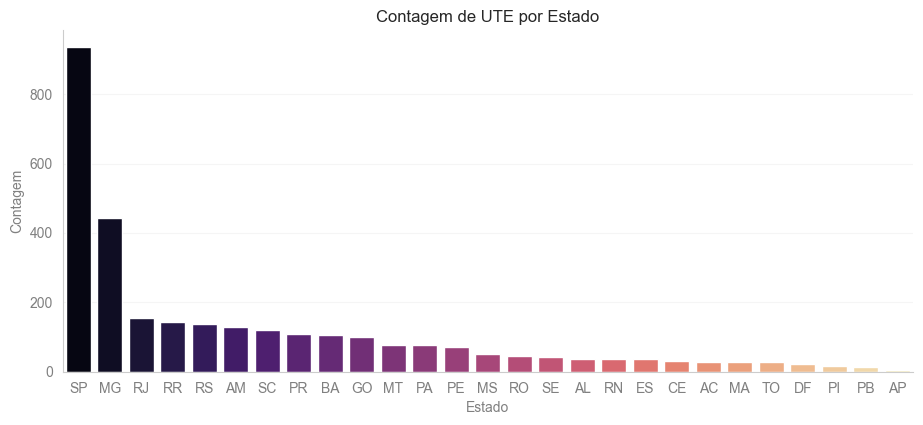

In [231]:
df_termoeletrica = df[df['SigTipoGeracao'] == 'UTE']['SigUFPrincipal'].value_counts().to_frame()
graph_termo = sns.catplot(x='index', y='SigUFPrincipal', kind='bar', data=df_termoeletrica.reset_index(), aspect=3, palette='magma')
graph_termo.set(title='Contagem de UTE por Estado', xlabel='Estado', ylabel='Contagem')
graph_termo.figure.set_size_inches(9,4)



In [242]:
df_pot_energia = df.groupby('SigTipoGeracao')['MdaPotenciaFiscalizadaKw'].sum().to_frame().reset_index()
df_pot_energia

,SigTipoGeracao,MdaPotenciaFiscalizadaKw
0,CGH,862241.0
1,EOL,25053921.0
2,PCH,5732357.0
3,UFV,8214233.0
4,UHE,103195357.0
5,UTE,46165457.0
6,UTN,1990000.0


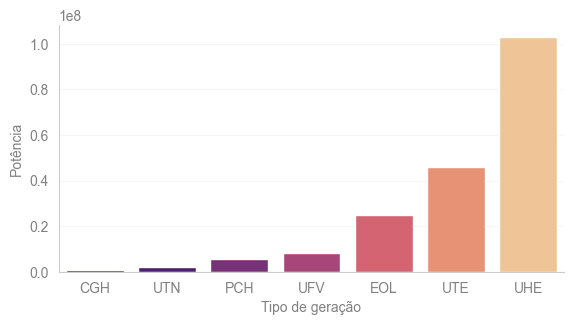

In [254]:
ordem_graph = df_pot_energia.sort_values('MdaPotenciaFiscalizadaKw')
pot_energy_graph = sns.catplot(x='SigTipoGeracao', y='MdaPotenciaFiscalizadaKw', kind='bar', data=df_pot_energia, aspect=1, palette='magma', order=list(ordem_graph['SigTipoGeracao']))
# Definir rótulos dos eixos
plt.xlabel('Tipo de geração')
plt.ylabel('Potência')
pot_energy_graph.figure.set_size_inches(6,3)

- grafico com a quantidade de usinas termeletricas por estado com os dadoscomputados acima
- separar o tipode combustivel de acordo com a sigla de energia; tipo UFV=radiação solar

## Entendendo os Tipos de Energia